In [1]:
import matplotlib.pyplot as plt
import sys
from numpy import pi
import numpy as np
sys.path.append('../')
import rcwa

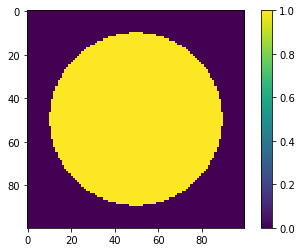

In [2]:
# discretization for patterend layer
Nx = 100
Ny = 100
radius = 0.4

# let's setup a cylinder grid, and here we plot eps_patterend to double check
dof = np.zeros((Nx,Ny))

x0 = np.linspace(0,1,Nx)
y0 = np.linspace(0,1,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5)**2+(y-.5)**2<radius**2
dof[sphere]=1
plt.figure();
plt.imshow(dof)
plt.colorbar()
plt.show()

In [15]:
reload(rcwa)
nG = 11
# lattice vector
Lx = .1
Ly = .1
L1 = [Lx,0.]
L2 = [0.,Ly]

# frequency and angles
freq = 1.
theta = 0.
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 1.
epsuniform3 = 1.
thick1 = 1.
thick2 = 1.
thick3 = 1.

# for patterned layer, eps = epsbkg + dof * epsdiff
epsbkg = 1.
epsdiff = 4.

# setup RCWA
obj = rcwa.RCWA_obj(nG,L1,L2,freq,theta,phi)
obj.Add_LayerUniform(thick1,epsuniform1)
obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerUniform(thick3,epsuniform3)
obj.Init_Setup(Gmethod=0)
# add DOF to rcwa
obj.GridLayer_getDOF(dof.flatten())

Total nG =  9


In [17]:
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
#ai,bi=rcwa.SolveInterior(0,obj.a0,obj.bN,obj.q_list,obj.phi_list,obj.kp_list,obj.thickness_list)
#print ai
R,T = obj.RT_Solve()
print R, T

e,h = obj.Get_FieldFourier(1,0)
Tx,Ty,Tz = obj.Get_ZStressTensorIntegral(0)
print Tx,Ty,Tz

0.06635379683752593 0.9336462031624745
-3.5373746401666845e-74 -3.395879654560017e-72 -1.0663537968375258
